In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [3]:
# https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension

In [4]:
data = pd.read_csv("dataS9.csv")

### Read headers and save them in an list

In [5]:
headers = list(data)
print(headers[26:28])

['Height', 'Weight']


In [6]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
# Checking if any values missing
data.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

### Find players with NA value in category Weight

In [8]:
print("Header N° 26: ",headers[26])
data[data[headers[26]].isna()].head()

Header N° 26:  Height


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13236,13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Discard platers with Weifht or Height missing

In [9]:
#Keep the DataFrame with valid entries in the same variable.
data.dropna(subset = ['Weight','Height'],inplace = True)

### Check total sumary of NA values

In [10]:
data.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST            

### Converting Value and Wages in numercial data format

In [11]:
## Converting players market value into value in Millions(M)
data['Value'] = data['Value'].fillna('NaN')
data['Value'] = data['Value'].apply(lambda x:
                                    float(re.findall('€(.*)M',x)[0]) if 'M' in x 
                                    else (float(re.findall('€(.*)K',x)[0])/1000 if 'K' in x  else 0))

In [12]:
## Converting players wages into value in Thousands (K)
data['Wage'] = data['Wage'].fillna('NaN')
data['Wage'] = data['Wage'].apply(lambda x:float(re.findall('€(.*)K',x)[0]) if 'K' in x 
                                  else float(re.findall('€(.*)',x)[0])/1000)

In [13]:
## Converting players release clause in Millions (M)
data['Release Clause'] = data['Release Clause'].fillna('NaN')
data['Release Clause'] = data['Release Clause'].apply(lambda x:
                                    float(re.findall('€(.*)M',x)[0]) if 'M' in x 
                                    else (float(re.findall('€(.*)K',x)[0])/1000 if 'K' in x  else 0))

### Total Players game in the game

In [14]:
print("Total players in fifa 19 - ",data.shape[0])

Total players in fifa 19 -  18159


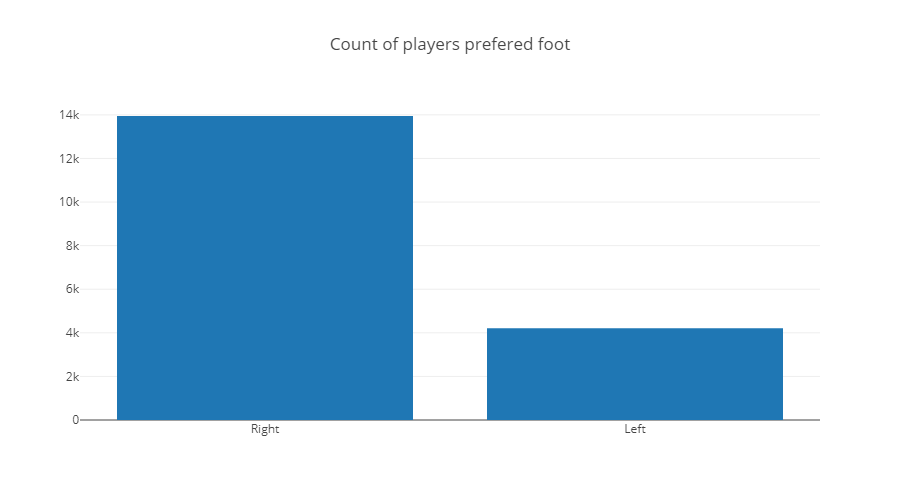

In [15]:
tm = data['Preferred Foot'].value_counts()
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    title = "Count of players prefered foot"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

### Position wise total players

Total number of positions in FIFA19 is 27


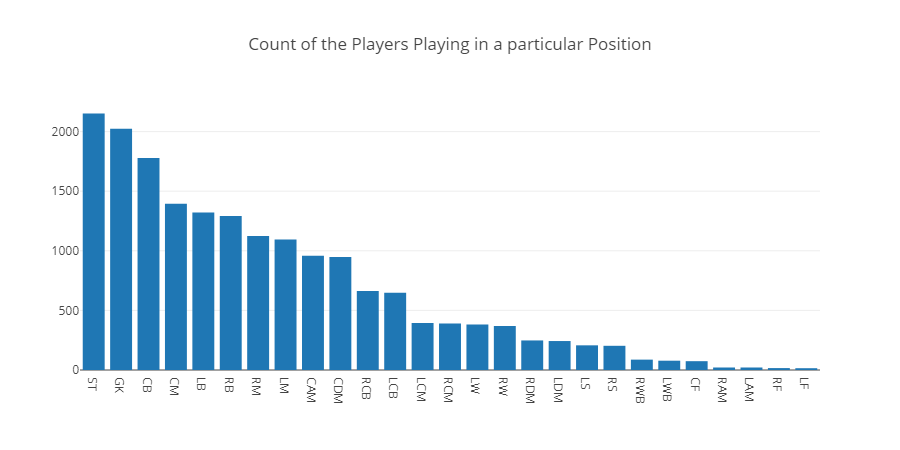

In [16]:
print("Total number of positions in FIFA19 is",data['Position'].nunique())
tm = data['Position'].value_counts()
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    title = "Count of the Players Playing in a particular Position"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

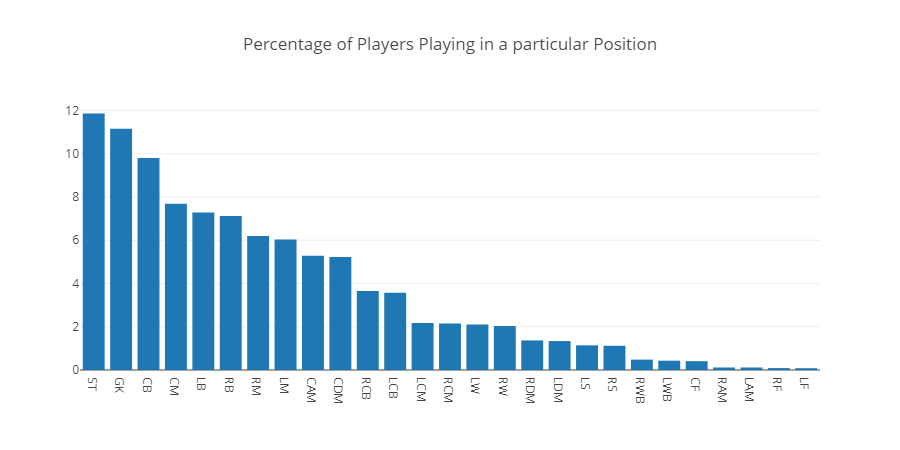

In [17]:
tm = data['Position'].value_counts(normalize=True)*100
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    title = "Percentage of Players Playing in a particular Position"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [18]:
forwards = ['ST','LF','RF','CF','LW','RW']
midfielders = ['CM','LCM','RCM','RM','LM','CDM','LDM','RDM','CAM','LAM','RAM','LCM','RCM']
defenders = ['CB','RB','LB','RCB','LCB','RWB','LWB'] 
goalkeepers = ['GK']
data['Overall_position'] = None
forward_players = data[data['Position'].isin(forwards)]
midfielder_players = data[data['Position'].isin(midfielders)]
defender_players = data[data['Position'].isin(defenders)]
goalkeeper_players = data[data['Position'].isin(goalkeepers)]
data.loc[forward_players.index,'Overall_position'] = 'forward'
data.loc[defender_players.index,'Overall_position'] = 'defender'
data.loc[midfielder_players.index,'Overall_position'] = 'midfielder'
data.loc[goalkeeper_players.index,'Overall_position'] = 'goalkeeper'

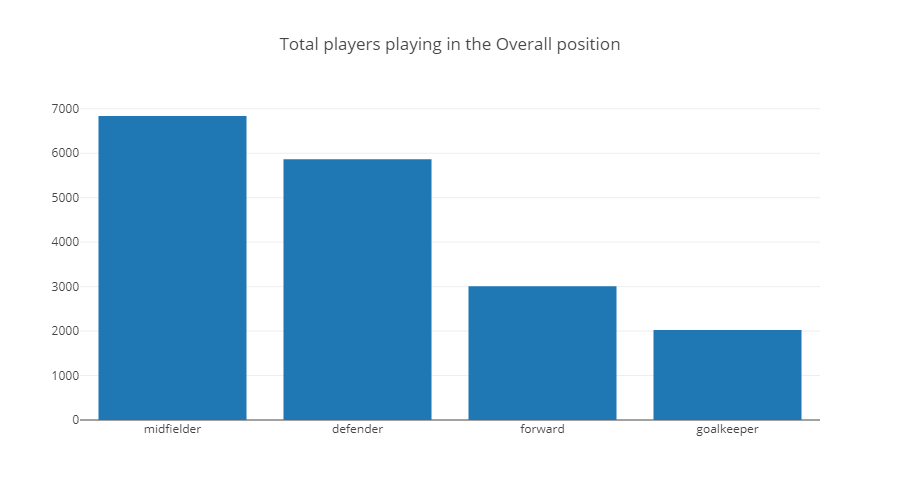

In [19]:
# sns.countplot(data['Overall_position'])
tm = data['Overall_position'].value_counts()
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    title = "Total players playing in the Overall position"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

### Now we find the top 5 best players in these 3 overall positions###

In [20]:
print("TOP 5 FORWARDS")
data[data['Overall_position'] == 'forward'].sort_values(by = 'Overall', ascending = False).head()

TOP 5 FORWARDS


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Overall_position
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,forward
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,forward
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,forward
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,forward
10,10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,...,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127.1,forward


In [21]:
print("TOP 5 MIDFIELDERS")
data[data['Overall_position'] == 'midfielder'].sort_values(by = 'Overall', ascending = False).head()

TOP 5 MIDFIELDERS


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Overall_position
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,midfielder
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4,midfielder
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156.8,midfielder
13,13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111.0,midfielder
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121.3,midfielder


In [22]:
print("TOP 5 DEFENDERS")
data[data['Overall_position'] == 'defender'].sort_values(by = 'Overall', ascending = False).head()

TOP 5 DEFENDERS


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Overall_position
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6,defender
12,12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,...,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90.2,defender
24,24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6,defender
34,34,178603,M. Hummels,29,https://cdn.sofifa.org/players/4/19/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern München,...,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,75.9,defender
35,35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,...,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88.2,defender


In [23]:
print("TOP 5 GOALKEEPERS")
data[data['Overall_position'] == 'goalkeeper'].sort_values(by = 'Overall', ascending = False).head()

TOP 5 GOALKEEPERS


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Overall_position
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,goalkeeper
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5,goalkeeper
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123.3,goalkeeper
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,...,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113.7,goalkeeper
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62.7,goalkeeper


### Player with most valuation

In [24]:
print("--------------Top 10 Highest Market Value in Millions € -------------- ")
data.sort_values(by = 'Value',ascending = False)[['Name','Age','Value','Overall','Potential','Position']].head(10)

--------------Top 10 Highest Market Value in Millions € -------------- 


,Name,Age,Value,Overall,Potential,Position
2,Neymar Jr,26,118.5,92,93,LW
0,L. Messi,31,110.5,94,94,RF
4,K. De Bruyne,27,102.0,91,92,RCM
5,E. Hazard,27,93.0,91,91,LF
15,P. Dybala,24,89.0,89,94,LF
16,H. Kane,24,83.5,89,91,ST
25,K. Mbappé,19,81.0,88,95,RM
7,L. Suárez,31,80.0,91,91,RS
17,A. Griezmann,27,78.0,89,90,CAM
10,R. Lewandowski,29,77.0,90,90,ST


In [25]:
print("--------------Top 10 Highest Wages Earned in Thousands € -------------- ")
data.sort_values(by = 'Wage',ascending = False)[['Name','Age','Wage','Overall','Potential','Position']].head(10)

--------------Top 10 Highest Wages Earned in Thousands € -------------- 


,Name,Age,Wage,Overall,Potential,Position
0,L. Messi,31,565.0,94,94,RF
7,L. Suárez,31,455.0,91,91,RS
6,L. Modrić,32,420.0,91,91,RCM
1,Cristiano Ronaldo,33,405.0,94,94,ST
8,Sergio Ramos,32,380.0,91,91,RCB
11,T. Kroos,28,355.0,90,90,LCM
36,G. Bale,28,355.0,88,88,ST
4,K. De Bruyne,27,355.0,91,92,RCM
5,E. Hazard,27,340.0,91,91,LF
32,Coutinho,26,340.0,88,89,LW


In [26]:
print("--------------Top 10 Highest Release Clause in Millions €-------------- ")
data.sort_values(by = 'Release Clause',ascending = False)[['Name','Age','Release Clause','Overall','Potential','Position']].head(10)

--------------Top 10 Highest Release Clause in Millions €-------------- 


,Name,Age,Release Clause,Overall,Potential,Position
2,Neymar Jr,26,228.1,92,93,LW
0,L. Messi,31,226.5,94,94,RF
4,K. De Bruyne,27,196.4,91,92,RCM
5,E. Hazard,27,172.1,91,91,LF
25,K. Mbappé,19,166.1,88,95,RM
17,A. Griezmann,27,165.8,89,90,CAM
7,L. Suárez,31,164.0,91,91,RS
16,H. Kane,24,160.7,89,91,ST
11,T. Kroos,28,156.8,90,90,LCM
30,Isco,26,156.2,88,91,LW


### Total Players from a Nation

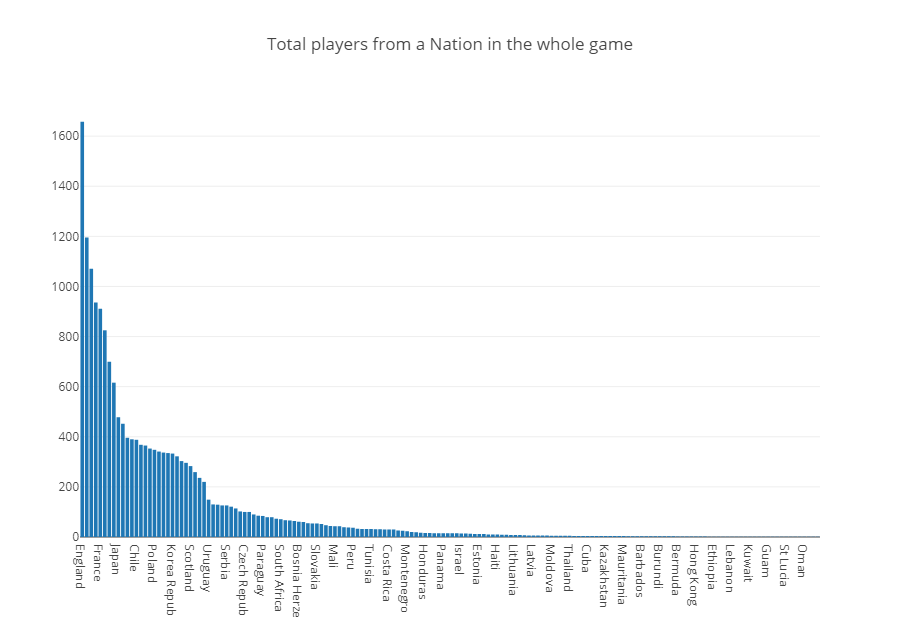

In [27]:
tm = data.groupby('Nationality').count()['ID'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=5000,
    height=600,
    title = "Total players from a Nation in the whole game"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

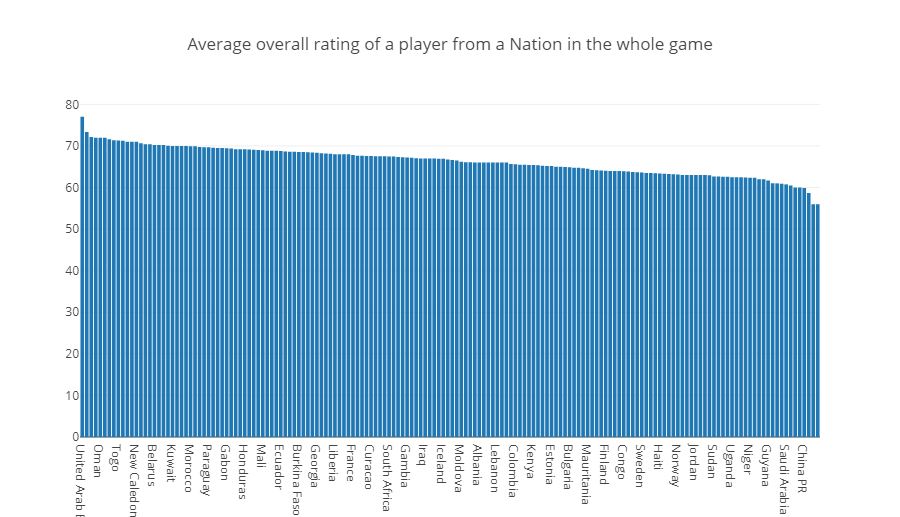

In [28]:
tm = data.groupby('Nationality').mean()['Overall'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=True,
    width=5000,
    height=500,
    title = "Average overall rating of a player from a Nation in the whole game"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [29]:
## Creating national team data using group by
national_team_data = data.groupby(['Nationality'],as_index = False).agg(['mean','count','sum'])

In [30]:
national_team_data.head()

Unnamed: 0                           ID                  \
                     mean count     sum           mean count       sum   
Nationality                                                              
Afghanistan  14335.500000     4   57342  234743.500000     4    938974   
Albania       9156.717949    39  357112  221588.769231    39   8641962   
Algeria       5602.183333    60  336131  206355.716667    60  12381343   
Andorra      13651.000000     1   13651  192937.000000     1    192937   
Angola        7979.333333    15  119690  206676.000000    15   3100140   

                   Age                Overall  ... GKKicking GKPositioning  \
                  mean count   sum       mean  ...       sum          mean   
Nationality                                    ...                           
Afghanistan  22.500000     4    90  61.000000  ...      37.0      8.500000   
Albania      24.076923    39   939  66.025641  ...     530.0     13.282051   
Algeria      27.050000    60  1623  70.633333  ...     888.0     15.183333   
Andorra      28.000000     1    28  62.000000  ...      12.0      8.000000   
Angola       25.866667    15   388  67.600000  ...     147.0     10.200000   

                         GKReflexes              Release Clause                 
            count    sum       mean count    sum           mean count      sum  
Nationality                                                                     
Afghanistan     4   34.0   9.250000     4   37.0       0.617250     4    2.469  
Albania        39  518.0  14.384615    39  561.0       3.436051    39  134.006  
Algeria        60  911.0  15.800000    60  948.0       8.184350    60  491.061  
Andorra         1    8.0   6.000000     1    6.0       0.384000     1    0.384  
Angola         15  153.0  10.200000    15  153.0       3.012400    15   45.186  

[5 rows x 141 columns]

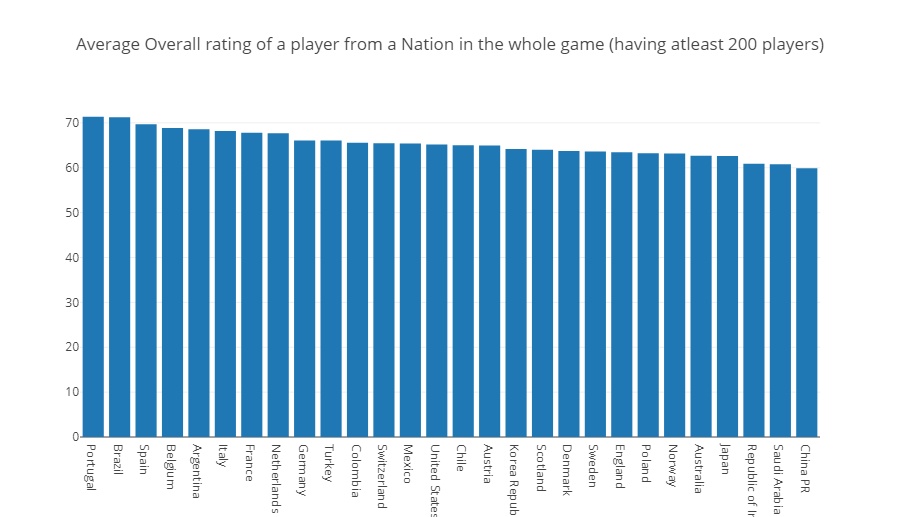

In [31]:
## So we consider average overall for those team which have atleast 200 players
tm = national_team_data[national_team_data['ID']['count']>200]['Overall']['mean'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    title = "Average Overall rating of a player from a Nation in the whole game (having atleast 200 players)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

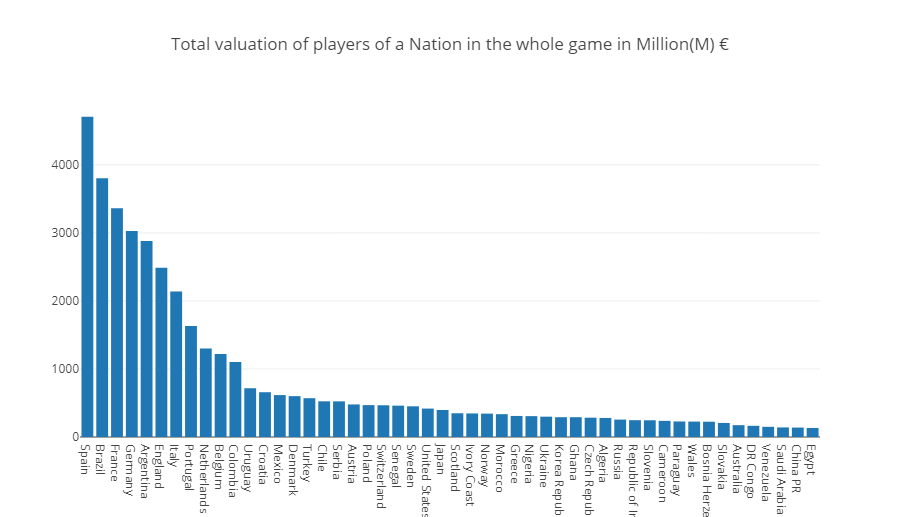

In [32]:
tm = national_team_data['Value']['sum'].sort_values(ascending = False).head(50)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=1500,
    height=500,
    title = "Total valuation of players of a Nation in the whole game in Million(M) €"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

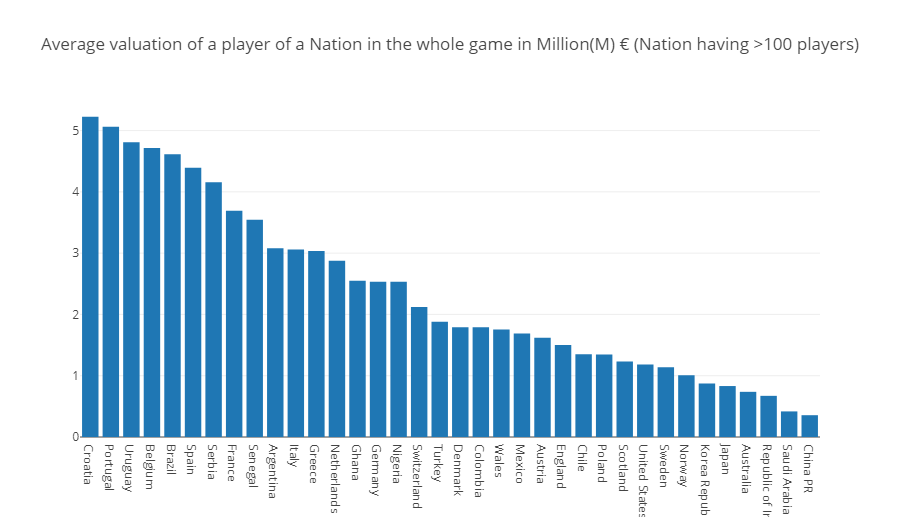

In [33]:
tm = national_team_data[national_team_data['ID']['count']>100]['Value']['mean'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    title = "Average valuation of a player of a Nation in the whole game in Million(M) € (Nation having >100 players)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

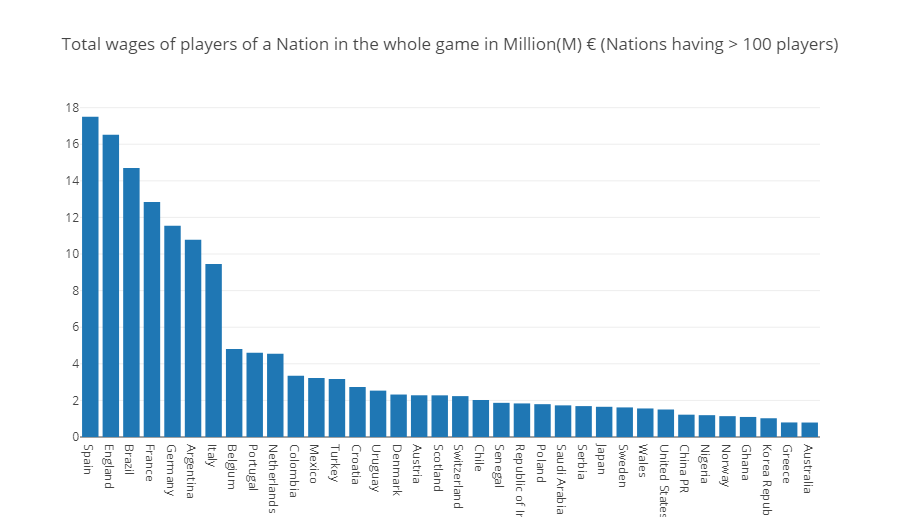

In [34]:
tm = national_team_data[national_team_data['ID']['count']>100]['Wage']['sum'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm/1000 # better to divide the wages(in K) by 1000 to convert them to Millions(M)
    )]
layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    title = "Total wages of players of a Nation in the whole game in Million(M) € (Nations having > 100 players)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

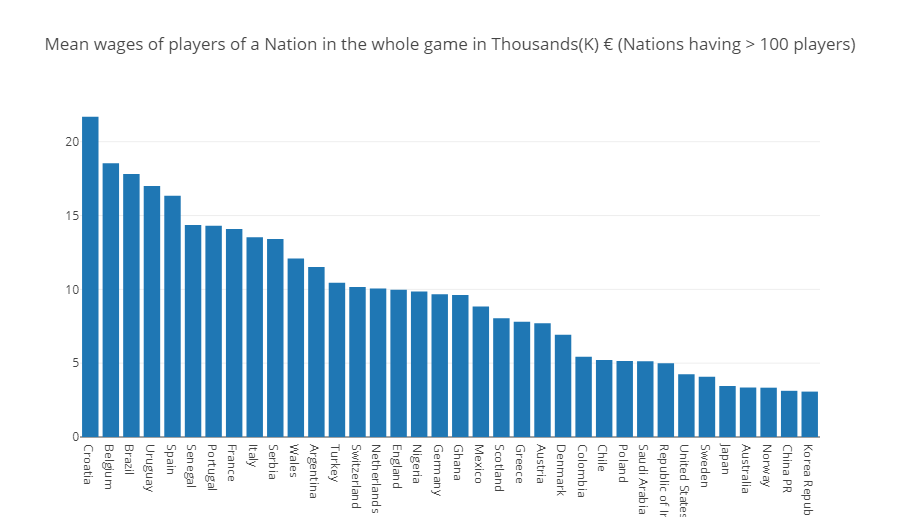

In [35]:
tm = national_team_data[national_team_data['ID']['count']>100]['Wage']['mean'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    title = "Mean wages of players of a Nation in the whole game in Thousands(K) € (Nations having > 100 players)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

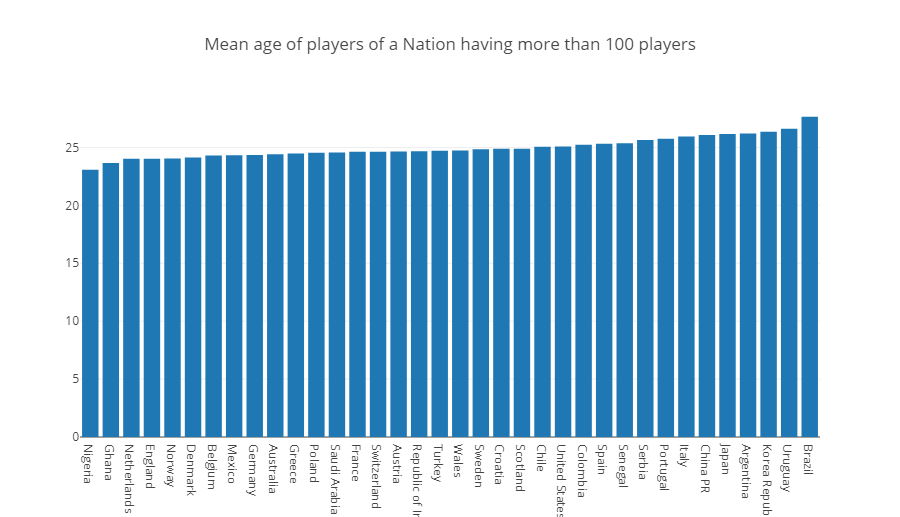

In [36]:
tm = national_team_data[national_team_data['ID']['count']>100]['Age']['mean'].sort_values(ascending = True)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    title = "Mean age of players of a Nation having more than 100 players"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

In [37]:
nations_more_players = national_team_data[national_team_data['ID']['count']>100]['ID'].sort_values(by = 'count',ascending =  False).index
tm = data.groupby(['Nationality','Overall_position']).agg(['count'])['ID'].unstack()
tm = tm.fillna(0)
tm = tm[tm.index.isin(nations_more_players)]

In [38]:
tm.head()

count                              
Overall_position defender forward goalkeeper midfielder
Nationality                                            
Argentina           286.0   188.0       97.0      342.0
Australia            76.0    44.0       29.0       84.0
Austria              96.0    35.0       44.0      117.0
Belgium              66.0    42.0       40.0      107.0
Brazil              282.0   152.0       68.0      300.0

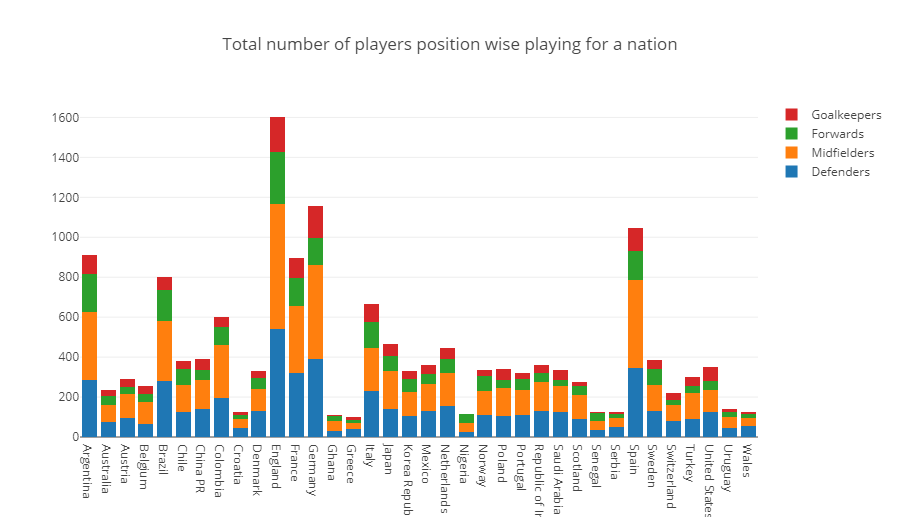

In [39]:
trace1 = go.Bar(
    x=tm.index,
    y=tm['count']['defender'],
    name='Defenders'
)
trace2 = go.Bar(
    x=tm.index,
    y=tm['count']['midfielder'],
    name='Midfielders'
)
trace3 = go.Bar(
    x=tm.index,
    y=tm['count']['forward'],
    name='Forwards'
)
trace4 = go.Bar(
    x=tm.index,
    y=tm['count']['goalkeeper'],
    name='Goalkeepers'
)
plt_data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='stack',
    title = "Total number of players position wise playing for a nation",
    width = 1200,
    height = 500
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

## Now moving to club analysis

In [40]:
top_50_clubs = data[data['Age']>18].groupby('Club').mean()['Overall'].sort_values(ascending = False).head(50)
top_50_clubs = top_50_clubs.index.tolist()
top_50_clubs = data[data['Club'].isin(top_50_clubs)]

In [41]:
top_50_clubs.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Overall_position
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,forward
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,forward
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,forward
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,goalkeeper
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,midfielder


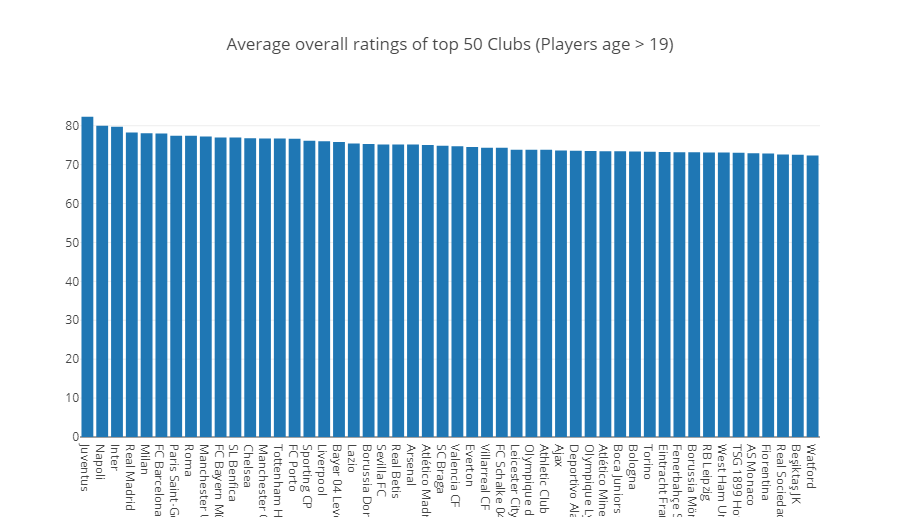

In [42]:
tm = top_50_clubs.groupby('Club').mean()['Overall'].sort_values(ascending = False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=2000,
    height=500,
    title = "Average overall ratings of top 50 Clubs (Players age > 19)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

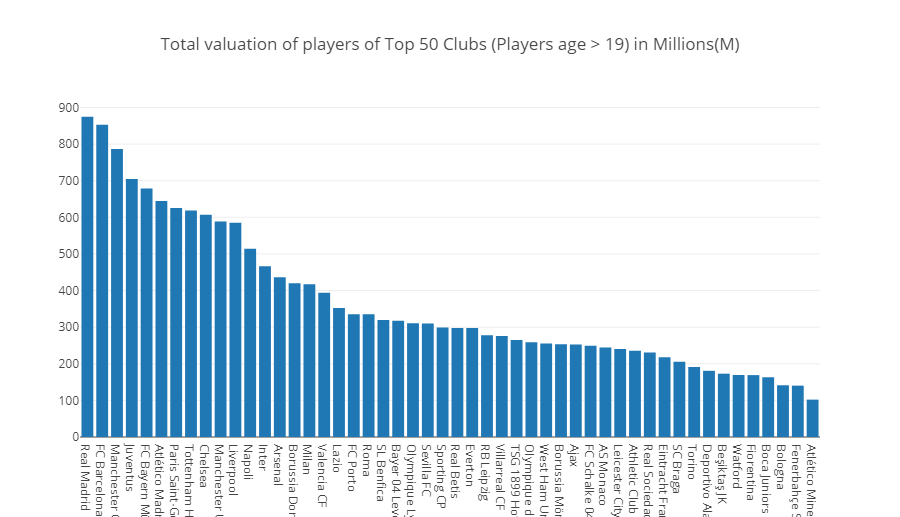

In [43]:
tm = top_50_clubs.groupby('Club').agg('sum')['Value'].sort_values(ascending=False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=2000,
    height=500,
    title = "Total valuation of players of Top 50 Clubs (Players age > 19) in Millions(M)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

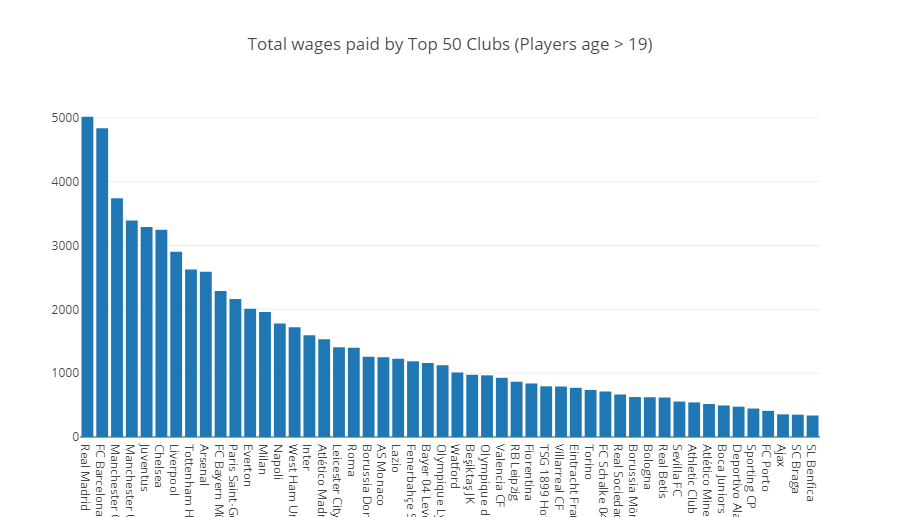

In [44]:
tm = top_50_clubs.groupby('Club').agg('sum')['Wage'].sort_values(ascending=False)
plt_data = [go.Bar(
    x = tm.index,
    y = tm
    )]
layout = go.Layout(
    autosize=False,
    width=2000,
    height=500,
    title = "Total wages paid by Top 50 Clubs (Players age > 19)"
)
fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

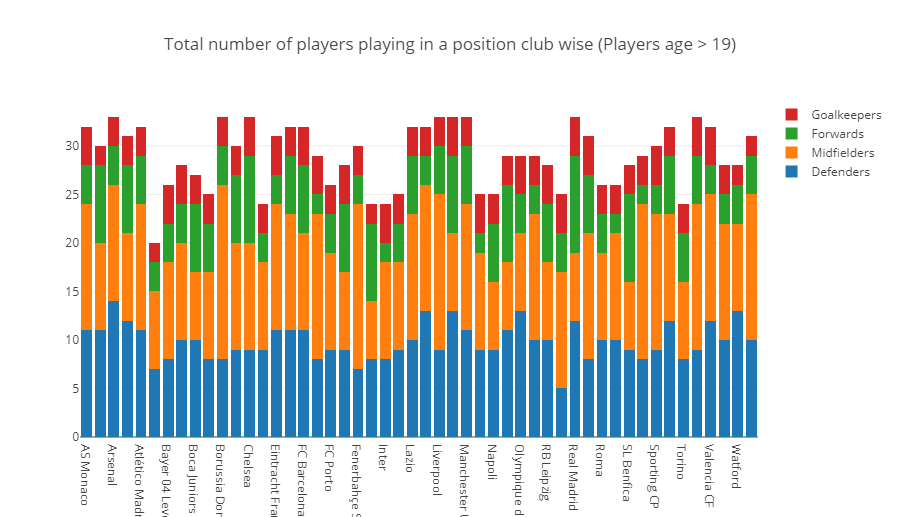

In [45]:
tm = top_50_clubs.groupby(['Club','Overall_position']).agg(['count'])['ID'].unstack()
trace1 = go.Bar(
    x=tm.index,
    y=tm['count']['defender'],
    name='Defenders'
)
trace2 = go.Bar(
    x=tm.index,
    y=tm['count']['midfielder'],
    name='Midfielders'
)
trace3 = go.Bar(
    x=tm.index,
    y=tm['count']['forward'],
    name='Forwards'
)
trace4 = go.Bar(
    x=tm.index,
    y=tm['count']['goalkeeper'],
    name='Goalkeepers'
)
plt_data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='stack',
    width=2000,
    height=500,
    title = "Total number of players playing in a position club wise (Players age > 19)"
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

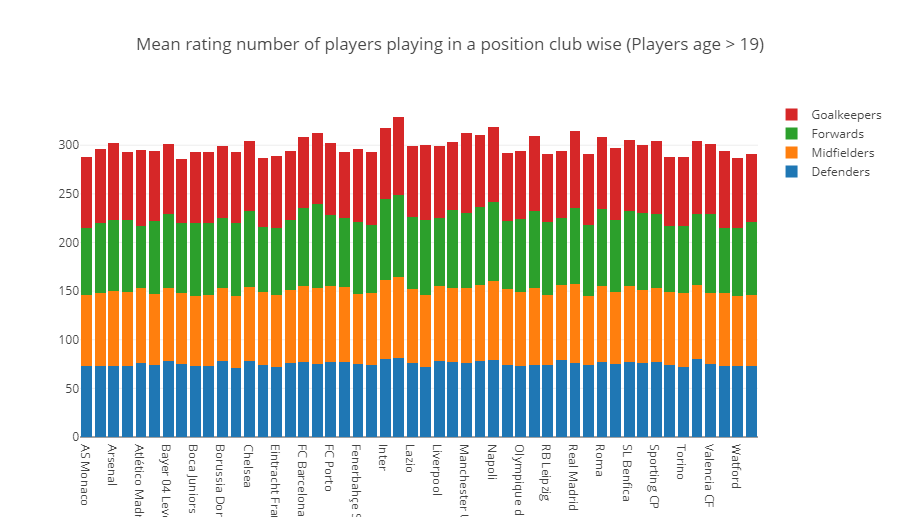

In [46]:
tm = top_50_clubs.groupby(['Club','Overall_position']).agg(['mean'])['Overall'].unstack()
trace1 = go.Bar(
    x=tm.index,
    y=tm['mean']['defender'],
    name='Defenders'
)
trace2 = go.Bar(
    x=tm.index,
    y=tm['mean']['midfielder'],
    name='Midfielders'
)
trace3 = go.Bar(
    x=tm.index,
    y=tm['mean']['forward'],
    name='Forwards'
)
trace4 = go.Bar(
    x=tm.index,
    y=tm['mean']['goalkeeper'],
    name='Goalkeepers'
)
plt_data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='stack',
    width=2000,
    height=500,
    title = "Mean rating number of players playing in a position club wise (Players age > 19)"
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

### Radar plot of top 10 forwards, midfielders, defenders and goalkeepers

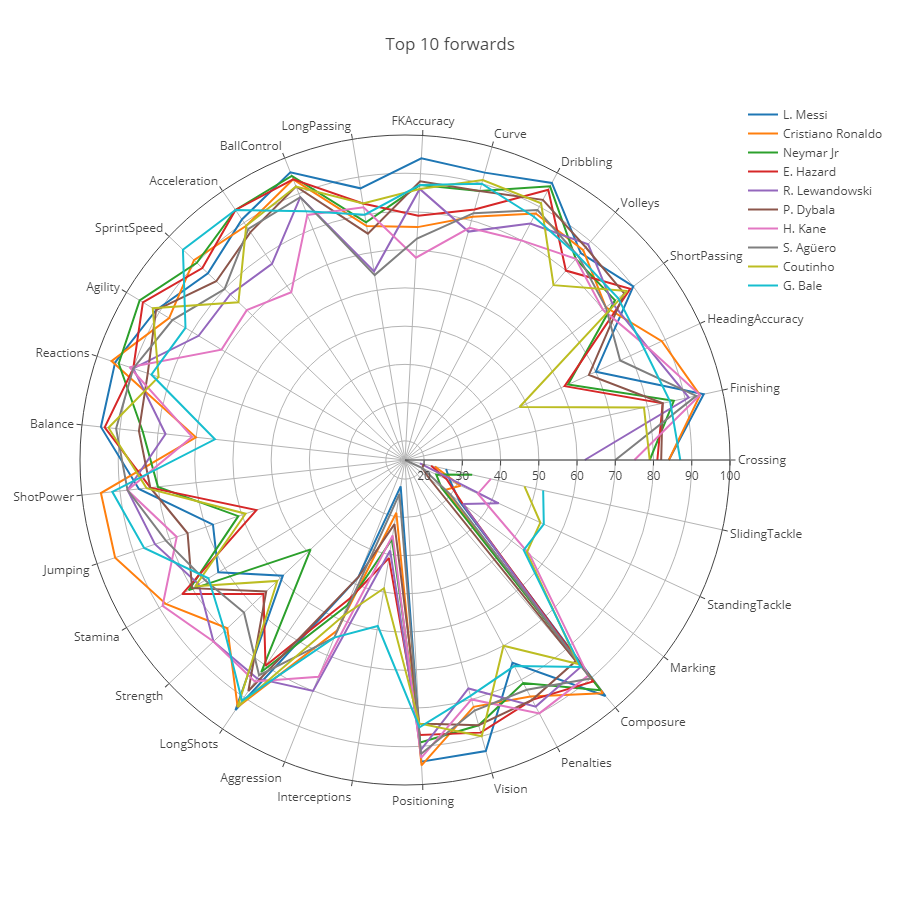

In [47]:
top_fwds = data[data['Overall_position'] == 'forward'].sort_values(by = 'Overall', ascending = False).head(10)
plt_cols = ['Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [15, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 forwards",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

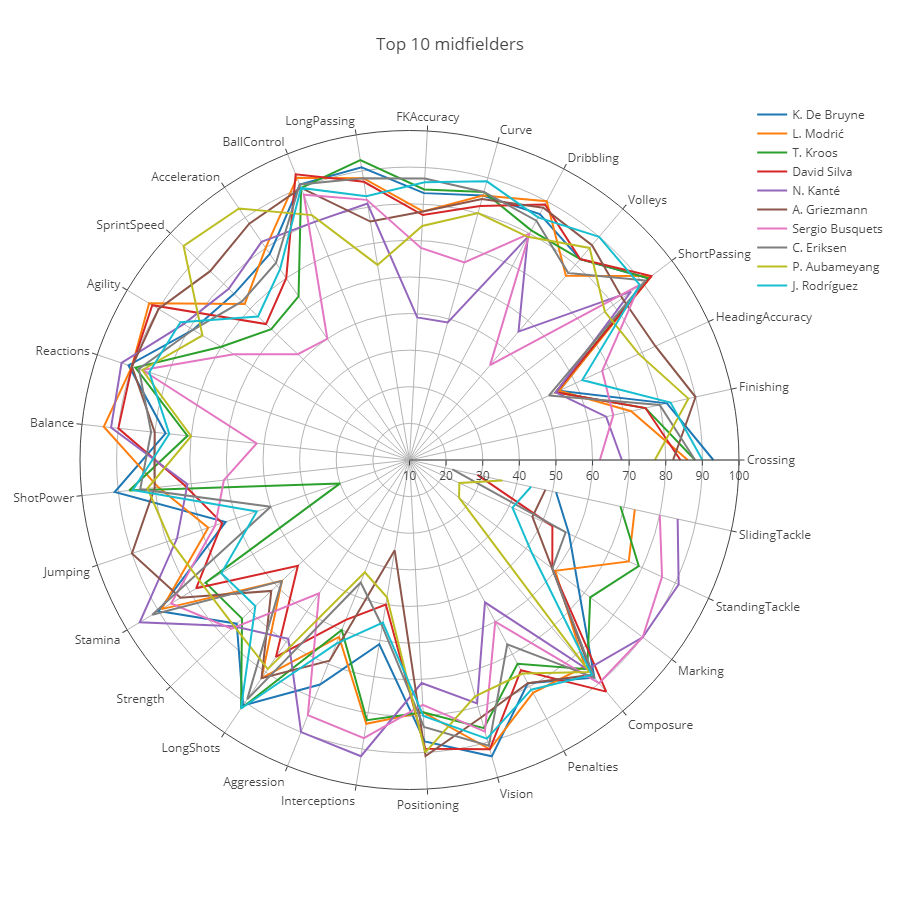

In [48]:
top_fwds = data[data['Overall_position'] == 'midfielder'].sort_values(by = 'Overall', ascending = False).head(10)
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [10, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 midfielders",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

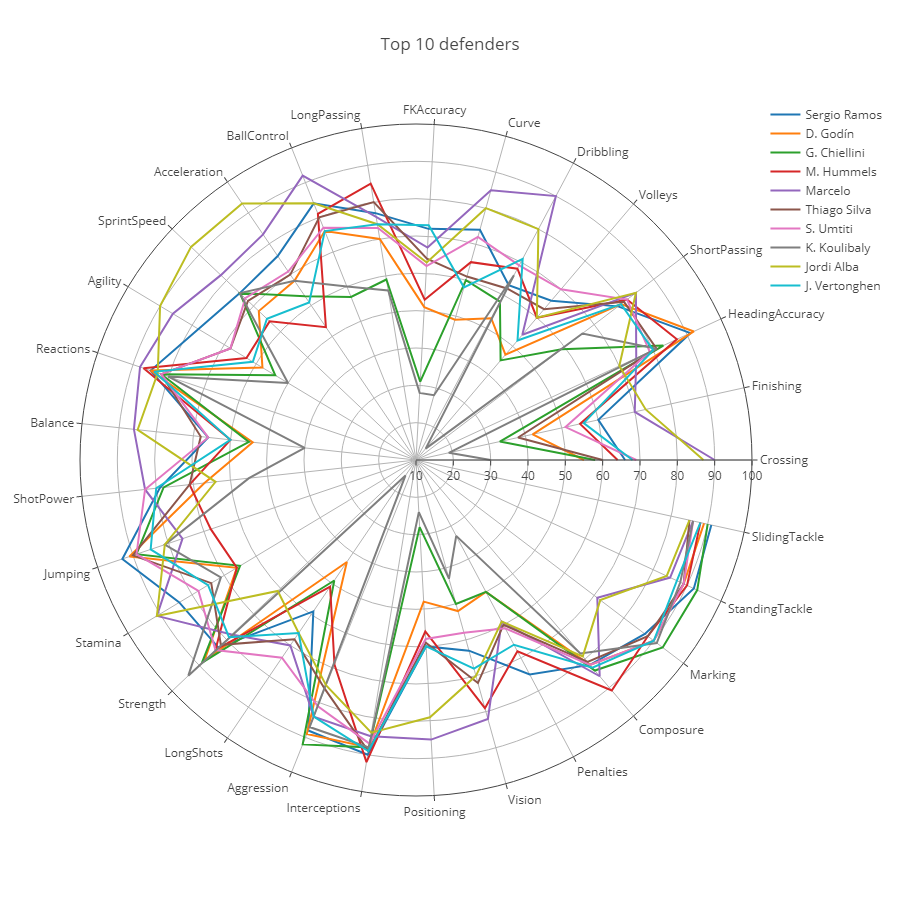

In [49]:
top_fwds = data[data['Overall_position'] == 'defender'].sort_values(by = 'Overall', ascending = False).head(10)
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [10, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 defenders",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

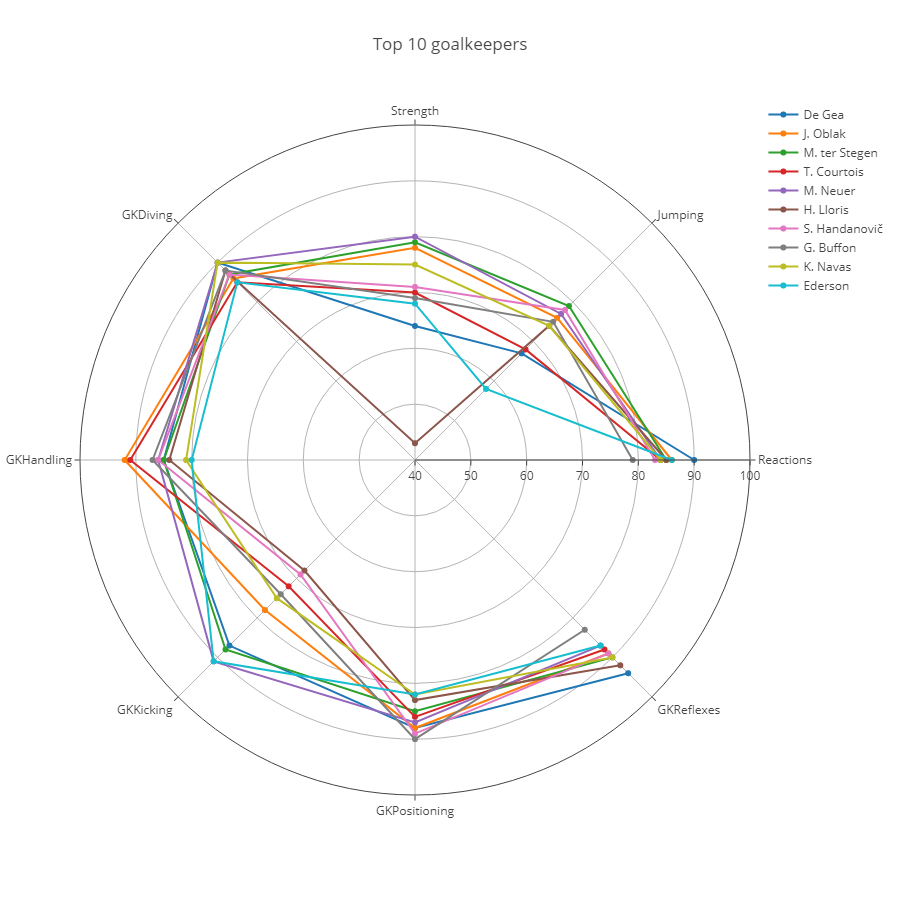

In [50]:
top_fwds = data[data['Overall_position'] == 'goalkeeper'].sort_values(by = 'Overall', ascending = False).head(10)
plt_cols = [ 'Reactions','Jumping','Strength','GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']
top_fwds.reset_index(inplace=True)
plt_data = [] 
for i in range(top_fwds.shape[0]):
    trace = go.Scatterpolar(
        r = top_fwds.loc[i,plt_cols],
        theta = plt_cols,
        #mode = 'lines',
        name = top_fwds.loc[i,'Name'],
    )
    plt_data.append(trace)
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [40, 100],
    )
  ),
    height = 900,
    width = 900,
    title = "Top 10 goalkeepers",
    showlegend = True
)

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)